In [2]:
import pandas
import networkx as nx
import pickle
from graph_generation import get_vac_graph_graphml_sample
import matplotlib.pyplot as plt
import numpy as np
import collections

In [3]:
G = get_vac_graph_graphml_sample()

In [4]:
len(G.nodes())

312622

In [5]:
color = nx.get_node_attributes(G, "status")

In [6]:
color

{'76561199016387141': 'Legit',
 '76561198211968339': 'Legit',
 '76561198281739227': 'Legit',
 '76561198071560038': 'Un-Processed',
 '76561198073310241': 'Legit',
 '76561198084571932': 'Un-Processed',
 '76561198086958285': 'Un-Processed',
 '76561198115589013': 'Legit',
 '76561198123500707': 'Un-Processed',
 '76561198271183088': 'Un-Processed',
 '76561198295658052': 'Legit',
 '76561198382248341': 'Un-Processed',
 '76561198800400612': 'Legit',
 '76561199038053319': 'Un-Processed',
 '76561199348301309': 'Legit',
 '76561199662454569': 'Legit',
 '76561199760478349': 'Legit',
 '76561199115258936': 'Legit',
 '76561199002388149': 'Legit',
 '76561199350681404': 'Legit',
 '76561199282618993': 'Legit',
 '76561198405707117': 'Cheater',
 '76561198860556306': 'Legit',
 '76561198830608478': 'Legit',
 '76561199596968274': 'Legit',
 '76561198357391626': 'Un-Processed',
 '76561199483933870': 'Legit',
 '76561199706782101': 'Legit',
 '76561199581768719': 'Legit',
 '76561198102374580': 'Legit',
 '7656119921

In [7]:
cheater_nodes = [n for n in G if G.nodes[n]['status'] == 'Cheater']
Cheater_sub_G = G.subgraph(cheater_nodes)

In [8]:
degree = G.degree['76561198296795226']

In [9]:
degree

191

In [11]:
bc = nx.betweenness_centrality(G, 2)

In [12]:
bc

{'76561199016387141': 0.0,
 '76561198211968339': 0.0,
 '76561198281739227': 0.0001520700917059652,
 '76561198071560038': 0.0,
 '76561198073310241': 8.982179585829832e-05,
 '76561198084571932': 4.651028888104194e-05,
 '76561198086958285': 0.0,
 '76561198115589013': 1.919269142271332e-05,
 '76561198123500707': 0.0,
 '76561198271183088': 0.0,
 '76561198295658052': 0.0006592049747321268,
 '76561198382248341': 0.0,
 '76561198800400612': 8.636711140220993e-05,
 '76561199038053319': 0.0,
 '76561199348301309': 0.0,
 '76561199662454569': 0.0,
 '76561199760478349': 0.0,
 '76561199115258936': 0.0,
 '76561199002388149': 0.0,
 '76561199350681404': 0.0,
 '76561199282618993': 0.0,
 '76561198405707117': 0.0,
 '76561198860556306': 0.0,
 '76561198830608478': 0.0,
 '76561199596968274': 0.0,
 '76561198357391626': 0.0,
 '76561199483933870': 0.0,
 '76561199706782101': 0.0,
 '76561199581768719': 0.0,
 '76561198102374580': 0.0,
 '76561199219138635': 0.0,
 '76561198005012144': 0.0,
 '76561198257461478': 0.0,
 

In [13]:
len(Cheater_sub_G.nodes)

1648

In [50]:
def degree_distribution_analysis(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    dmax = max(degree_sequence)
    print(dmax)
    
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.hist(degree_sequence, bins=300)
    ax2.set_xlim((0,50))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()
    

In [51]:
def degree_distribution_analysis_cdf(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    cs = np.cumsum(cnt)
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.loglog(deg, cs, "b-", marker="o")
    ax1.set_title("Cumulative Distribution plot")
    ax1.set_ylabel("CDF")
    ax1.set_xlabel("Degree")

    fig.tight_layout()
    plt.show()
    

In [52]:
def degree_distribution_analysis_ccdf(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    cs = np.cumsum(cnt)
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    ccdf = np.sum(cnt) - cs + cnt
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.loglog(deg, ccdf, "b-", marker="o")
    ax1.set_title("Cumulative Distribution plot")
    ax1.set_ylabel("CDF")
    ax1.set_xlabel("Degree")

    fig.tight_layout()
    plt.show()

In [66]:
def degree_distribution_analysis_ccdf_alt(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    total_nodes = sum(cnt)
    cs = np.cumsum(cnt)
    
    cdf = cs / total_nodes
    
    ccdf = 1 - cdf
    
    
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(deg, ccdf, "b-", marker="o")
    ax1.set_title("Cumulative Distribution plot")
    ax1.set_ylabel("CDF")
    ax1.set_xlabel("Degree")

    fig.tight_layout()
    plt.show()

In [67]:
def degree_distribution_analysis_cdf_alt(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    total_nodes = sum(cnt)
    cs = np.cumsum(cnt)
    
    cdf = cs / total_nodes
    
    
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.loglog(deg, cdf, "b-", marker="o")
    ax1.set_title("Cumulative Distribution plot")
    ax1.set_ylabel("CDF")
    ax1.set_xlabel("Degree")

    fig.tight_layout()
    plt.show()

In [68]:
def degree_distribution_analysis_atleast_one_friend(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    filtered_sequence = [i for i in degree_sequence if i != 0]
    dmax = max(filtered_sequence)
    print(dmax)
    
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    
    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(filtered_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.hist(filtered_sequence, bins=300)
    ax2.set_xlim((0,50))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

In [69]:
def betweenness_centrality_analysis_atleast_one_friend(graph: nx.graph, atribute_name: str, atribute_value: str):
    # atribute_nodes = [n for n in G if G.nodes[n][atribute_name] == atribute_value]
    
    degree_sequence = sorted((d for n, d in graph.degree() if graph.nodes[n][atribute_name] == atribute_value), reverse=True)
    filtered_sequence = [i for i in degree_sequence if i != 0]
    dmax = max(filtered_sequence)
    print(dmax)
    
    title = "Degree of the " + atribute_value + " nodes in the graph"
    fig = plt.figure(title, figsize=(8, 8))
    axgrid = fig.add_gridspec(5, 4)
    
    

    fig.tight_layout()
    plt.show()

831


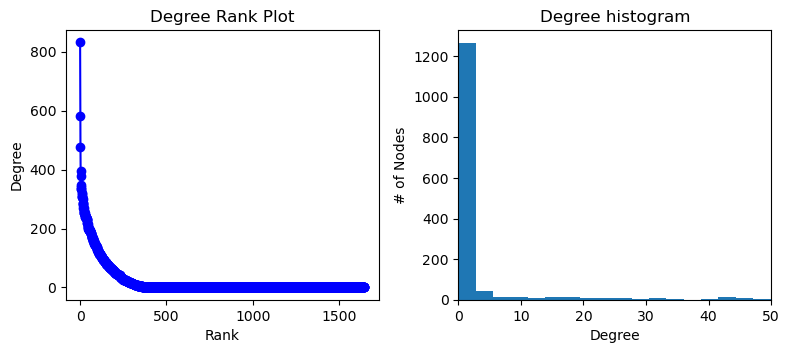

In [70]:
degree_distribution_analysis(G, 'status', 'Cheater')

1398


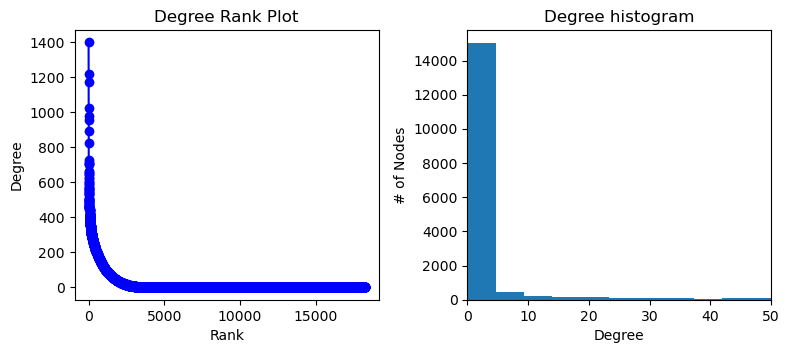

In [71]:
degree_distribution_analysis(G, 'status', 'Legit')

831


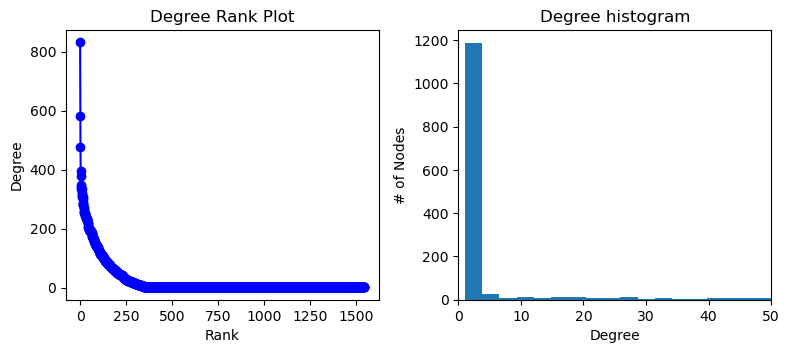

In [72]:
degree_distribution_analysis_atleast_one_friend(G, 'status', 'Cheater')

1398


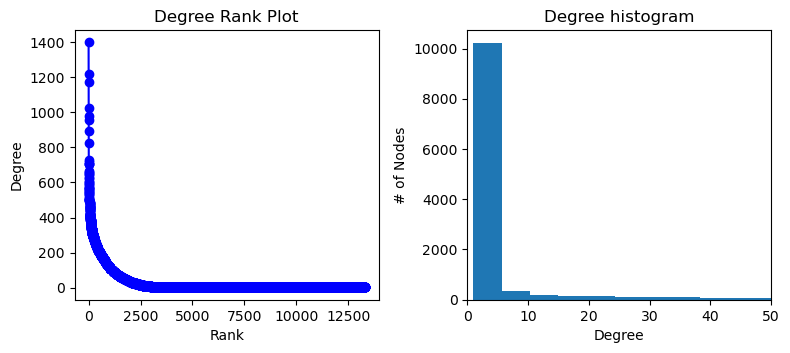

In [73]:
degree_distribution_analysis_atleast_one_friend(G, 'status', 'Legit')

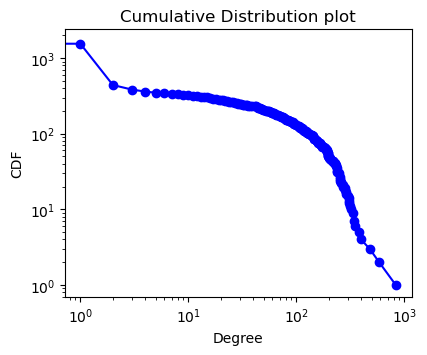

In [74]:
degree_distribution_analysis_cdf(G, 'status', 'Cheater')

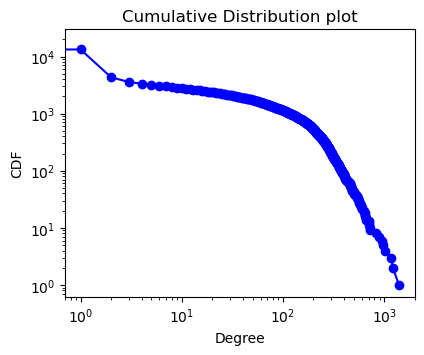

In [75]:
degree_distribution_analysis_cdf(G, 'status', 'Legit')

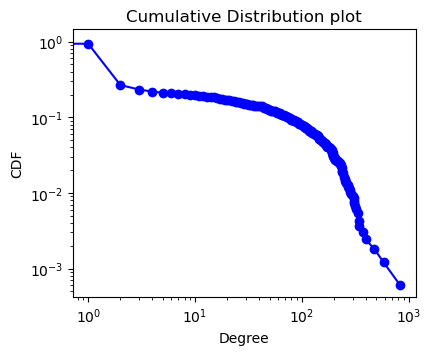

In [76]:
degree_distribution_analysis_cdf_alt(G, 'status', 'Cheater')

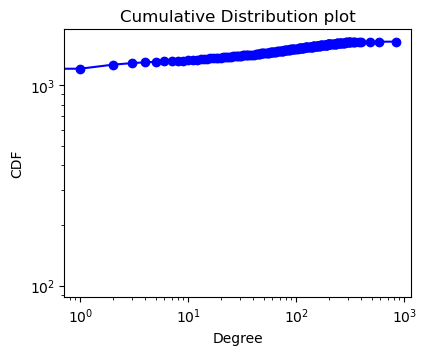

In [77]:
degree_distribution_analysis_ccdf(G, 'status', 'Cheater')

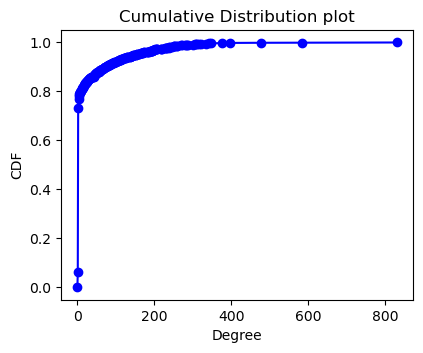

In [78]:
degree_distribution_analysis_ccdf_alt(G, 'status', 'Cheater')